# Riemann Indicatrix

In [1]:
#JAX
import jax.numpy as jnp
import jax.random as jran
from jax import vmap
from jax import random as jran


#Scipy
from scipy.ndimage.filters import gaussian_filter

#Matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import matplotlib.ticker as tkr

#celluloid
from celluloid import Camera # getting the camera

#IPython.display
from IPython.display import HTML # to show the animation in Jupyter

#jaxgeometry
from jaxgeometry.manifolds import RiemannIndicatrix
from jaxgeometry.setup import dts

/tmp/ipykernel_305968/1969095373.py:9: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter
2023-11-07 13:17:49.449469: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


## Define File Paths

In [2]:
figure_path = 'Figures/riemann_indicatrix/'

In [3]:
#hyper-parameters
T = 1.0
N_grid = 100
start = -2.0
end = 2.0

In [4]:
#Plotting
plt.rcParams.update({'font.size': 20})
cbformat = tkr.ScalarFormatter()   # create the formatter
cbformat.set_powerlimits((-2,2)) 

## Defining Manifold

In [5]:
mua_fun = lambda t,x: (1+t+x[0][0]**2+x[0][1]**2)*0.5/((1+t)**2)
mub_fun = lambda t,x: (1+t+x[0][0]**2+x[0][1]**2)*0.5/((1+t)**2)
mutheta_fun = lambda t,x: jnp.zeros(1, dtype=jnp.float32)

sigmaa_fun = lambda t,x: 0.1*(1-jnp.exp(-(x[0][1]+t)**4))#jnp.exp(-(x[0][1]+x[0][2]+t)**4)
sigmab_fun = lambda t,x: 0.1*(1-jnp.exp(-(x[0][2]+t)**4))#jnp.exp(-(x[0][1]+x[0][2]+t)**4)
sigmatheta_fun = lambda t,x: jnp.zeros(1, dtype=jnp.float32)

In [6]:
M = RiemannIndicatrix(mua_fun=lambda x: mua_fun(T,x),
                      mub_fun=lambda x: mub_fun(T,x),
                      mutheta_fun=lambda x: mutheta_fun(T,x),
                      eps=jnp.zeros(3),
                      sigmaa_fun=lambda x: sigmaa_fun(T,x),
                      sigmab_fun=lambda x: sigmab_fun(T,x),
                      sigmatheta_fun=lambda x: sigmatheta_fun(T,x))

using M.Exp for Logarithm


## Defining grid

In [7]:
t_grid = jnp.linspace(0,1,N_grid)
x1_grid = jnp.linspace(start,end,N_grid)
x2_grid = jnp.linspace(start,end,N_grid)
X1_grid, X2_grid = jnp.meshgrid(x1_grid,x2_grid)
X_grid = jnp.concatenate((X1_grid.reshape(N_grid, N_grid, 1), 
                          X2_grid.reshape(N_grid, N_grid, 1)), axis=-1)


N_plot = 10
t_plot = jnp.linspace(0,1,N_plot)
x1_plot = jnp.linspace(start,end,N_plot)
x2_plot = jnp.linspace(start,end,N_plot)
X1_plot, X2_plot = jnp.meshgrid(x1_plot,x2_plot)
X_plot = jnp.concatenate((X1_plot.reshape(N_plot, N_plot, 1), 
                          X2_plot.reshape(N_plot, N_plot, 1)), axis=-1)

### Indicatrices 

In [8]:
def indicatrix(t, x, N=100):
    
    x = (x, jnp.zeros(len(x)))
    
    phi = jnp.linspace(0, 2*jnp.pi, N)
    
    a = mua_fun(t,x)
    b = mub_fun(t,x)
    theta = mutheta_fun(t,x)
    
    x1 = a*jnp.cos(phi)*jnp.cos(theta)-b*jnp.sin(phi)*jnp.sin(theta)+x[0][0]
    x2 = a*jnp.cos(phi)*jnp.sin(theta)+b*jnp.sin(phi)*jnp.cos(theta)+x[0][1]
    
    return x1, x2

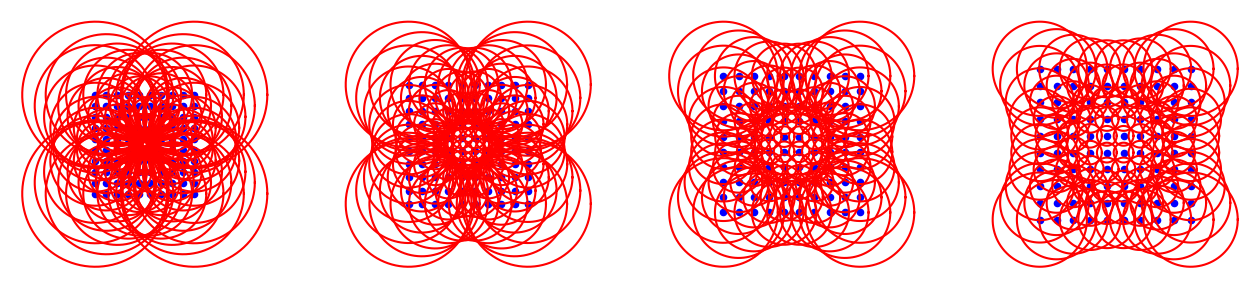

In [9]:
q1, q2 = vmap(lambda t: vmap(lambda y: vmap(lambda x: indicatrix(t, x))(y))(X_plot))(jnp.array([0.25,0.5,0.75,1.0]))
fig = plt.figure(figsize=(16,4))
for k in range(4):
    ax = fig.add_subplot(1,4,k+1)
    for i in range(N_plot):
        for j in range(N_plot):
            ax.plot(q1[k][i,j,:], q2[k][i,j,:], color='red')
            ax.scatter(X_plot[i,j,0], X_plot[i,j,1], color='blue', s=20)

    ax.set_xlabel("$x^{1}$")
    ax.set_ylabel("$x^{2}$")
    ax.grid()
    ax.set_box_aspect(1.0)
    ax.set_axis_off()

plt.show()
fig.savefig(figure_path+'rm_indicatrix.pdf', format="pdf", bbox_inches="tight")

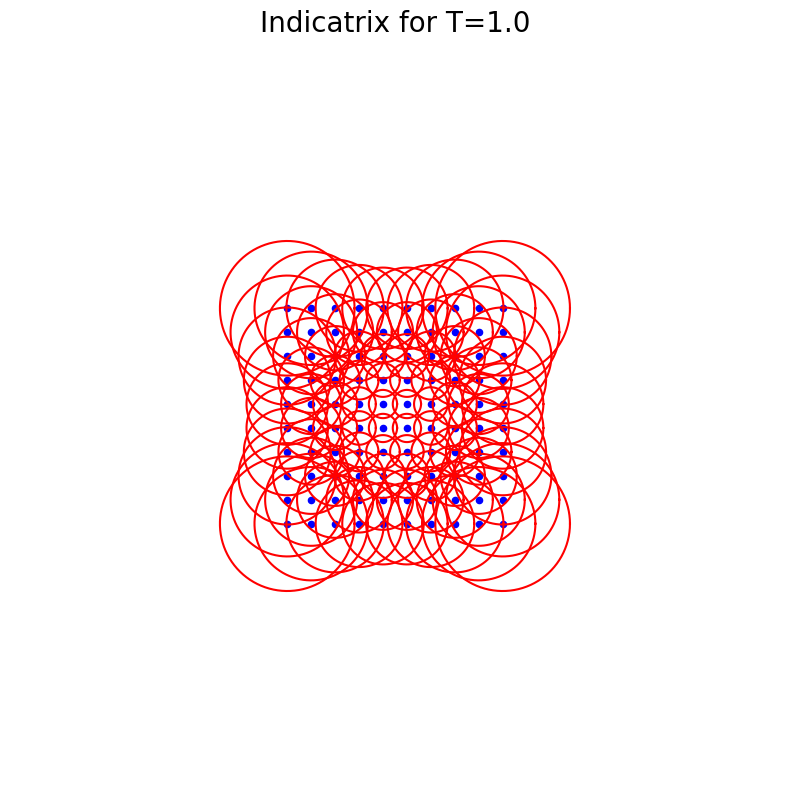

In [10]:
#heatmap, xedges, yedges = np.histogram2d(spherical_data[:,0], spherical_data[:,1], bins=bins)
#heatmap = gaussian_filter(sec, sigma=1.0)
#heatmap /= jnp.linalg.norm(heatmap)
#heatmap = sec[:,50,:]
q1, q2 = vmap(lambda t: vmap(lambda y: vmap(lambda x: indicatrix(t, x))(y))(X_plot))(t_plot)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
camera = Camera(fig)# the camera gets the fig we'll plot
ax.set_xlabel("$x^{1}$")
ax.set_ylabel("$x^{2}$")
#ax.set_title("Indicatrices for T")
ax.grid()
ax.set_box_aspect(1.0)
ax.set_axis_off()
for k in range(len(t_plot)):
    for i in range(N_plot):
        for j in range(N_plot):
            ax.plot(q1[k,i,j,:], q2[k,i,j,:], color='red')
            ax.scatter(X_plot[i,j,0], X_plot[i,j,1], color='blue', s=20)

    ax.text(0.325, 1.0, f"Indicatrix for T={t_plot[k]:.1f}", transform=ax.transAxes)
    #fig.colorbar(m, ax=ax, fraction=0.045, pad=0.05)
    
    camera.snap()
animation = camera.animate() # animation ready
animation.save(figure_path+'rm_indicatrix.gif',
               dpi=300,
               savefig_kwargs={
                   'pad_inches': 'tight'
               }
              )
HTML(animation.to_html5_video()) # displaying the animation

    #plt.show()
    #fig.savefig(figure_path+'volume'+str(t_val[i]).replace('.','_')+'.pdf', format="pdf", bbox_inches="tight")

### Computing the Metric

In [225]:
def volume_measure(t, x):
    
    M = RiemannIndicatrix(mua_fun=lambda x: mua_fun(t,x),
                        mub_fun=lambda x: mub_fun(t,x),
                   mutheta_fun=lambda x: mutheta_fun(t,x),
                   eps=jnp.zeros(3),
                   sigmaa_fun=lambda x: sigmaa_fun(t,x),
                   sigmab_fun=lambda x: sigmab_fun(t,x),
                   sigmatheta_fun=lambda x: sigmatheta_fun(t,x))
    
    return jnp.sqrt(jnp.linalg.det(M.g((x, jnp.zeros(1)))))

using M.Exp for Logarithm


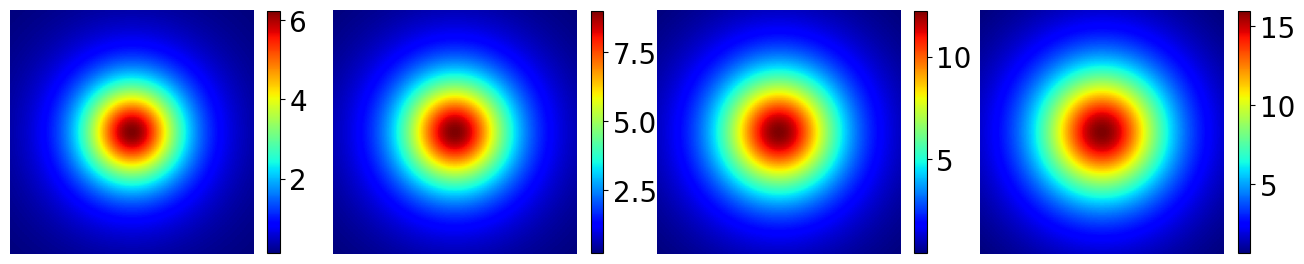

In [226]:
#heatmap, xedges, yedges = np.histogram2d(spherical_data[:,0], spherical_data[:,1], bins=bins)
#heatmap = gaussian_filter(sec, sigma=1.0)
#heatmap /= jnp.linalg.norm(heatmap)
#heatmap = sec[:,50,:]
g = vmap(lambda t: vmap(lambda y: vmap(lambda x: volume_measure(t,x))(y))(X_grid))(jnp.array([0.25,0.5,0.75,1.0]))
extent = [start, end, start, end]
fig = plt.figure(figsize=(16,4))
for k in range(4):
    ax = fig.add_subplot(1,4,k+1)
    ax.imshow(g[k].T, extent=extent, origin='lower', cmap=cm.jet)
    ax.set_xlim([start, end])
    ax.set_ylim([start, end])
    #ax.set_title(f"Riemannian Volume Measure for T={T:.1f}")
    ax.set_xlabel(r'$x^{1}$')
    ax.set_ylabel(r'$x^{2}$')
    m = mpl.cm.ScalarMappable(cmap=mpl.cm.jet)
    m.set_array(g[k])
    fig.colorbar(m, ax=ax, fraction=0.045, pad=0.05)
    ax.set_box_aspect(1.0)
    ax.set_axis_off()

plt.show()
fig.savefig(figure_path+'rm_volume.pdf', format="pdf", bbox_inches="tight")

using M.Exp for Logarithm


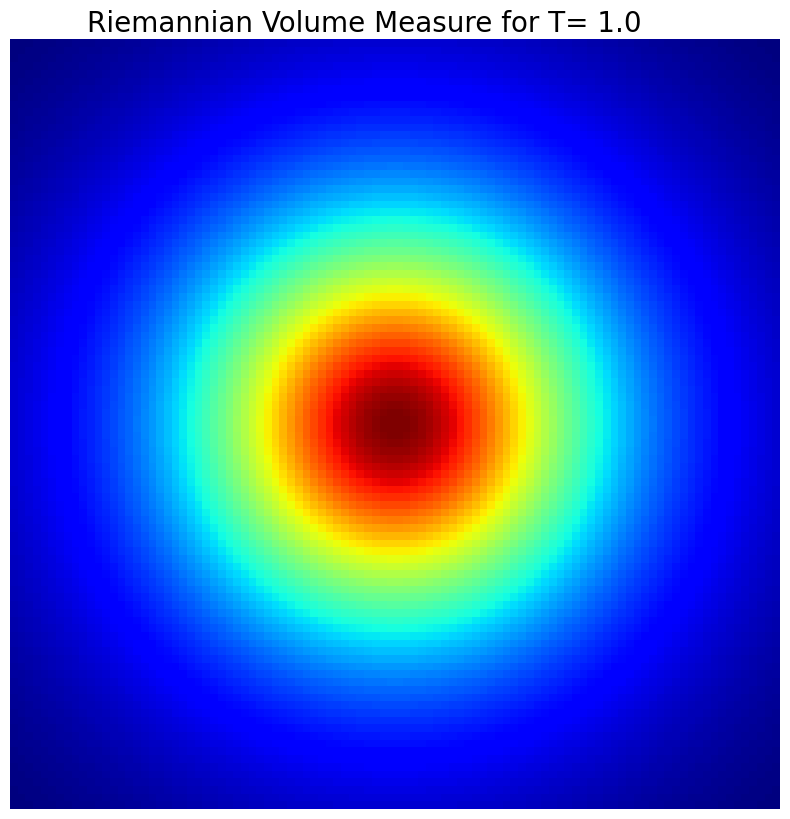

In [210]:
#heatmap, xedges, yedges = np.histogram2d(spherical_data[:,0], spherical_data[:,1], bins=bins)
#heatmap = gaussian_filter(sec, sigma=1.0)
#heatmap /= jnp.linalg.norm(heatmap)
#heatmap = sec[:,50,:]
g = vmap(lambda t: vmap(lambda y: vmap(lambda x: \
                                       volume_measure(t,x))(y))(X_grid))(t_plot)
extent = [start, end, start, end]
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
camera = Camera(fig)# the camera gets the fig we'll plot
ax.set_xlabel("$x^{1}$")
ax.set_ylabel("$x^{2}$")
ax.grid()
ax.set_box_aspect(1.0)
ax.set_axis_off()
for i in range(len(t_plot)):
    ax.imshow(g[i].T, extent=extent, origin='lower', cmap=cm.jet)
    ax.set_xlim([start, end])
    ax.set_ylim([start, end])
    ax.set_xlabel(r'$x^{1}$')
    ax.set_ylabel(r'$x^{2}$')
    ax.text(0.1, 1.01, f"Riemannian Volume Measure for T= {t_plot[i]:.1f}", transform=ax.transAxes)
    m = mpl.cm.ScalarMappable(cmap=mpl.cm.jet)
    m.set_array(g[i])
    #fig.colorbar(m, ax=ax, fraction=0.045, pad=0.05)
    
    camera.snap()
animation = camera.animate() # animation ready
animation.save(figure_path+'rm_volume.gif',
               dpi=300,
               savefig_kwargs={
                   'pad_inches': 'tight'
               }
              )
HTML(animation.to_html5_video()) # displaying the animation

    #plt.show()
    #fig.savefig(figure_path+'volume'+str(t_val[i]).replace('.','_')+'.pdf', format="pdf", bbox_inches="tight")

### IVP Geodesics

In [211]:
def M_geodesic(t):
    
    M = RiemannIndicatrix(mua_fun=lambda x: mua_fun(t,x),
                        mub_fun=lambda x: mub_fun(t,x),
                   mutheta_fun=lambda x: mutheta_fun(t,x),
                   eps=jnp.zeros(3),
                   sigmaa_fun=lambda x: sigmaa_fun(t,x),
                   sigmab_fun=lambda x: sigmab_fun(t,x),
                   sigmatheta_fun=lambda x: sigmatheta_fun(t,x))
    
    dt = dts(n_steps=100)


    N_spray = 100
    p0 = (jnp.zeros(2)+0.5, jnp.zeros(1))
    phi = jnp.linspace(0, 2*jnp.pi,N_spray)
    v = jnp.array([jnp.cos(phi), jnp.sin(phi)]).T
    v = v.T/vmap(lambda w: jnp.sqrt(w.dot(M.g(p0)).dot(w)))(v)
    
    time_grid, gamma, gamma_chart = vmap(lambda v: M.geodesic(p0, v, dt))(v.T)
    
    return time_grid, gamma[:,:,0], gamma_chart, gamma[:,:,1]

time_grid, rm_gamma, gamma_chart, gamma_v = vmap(lambda t: M_geodesic(t))(jnp.array([0.25, 0.5, 0.75, 1.0]))

using M.Exp for Logarithm


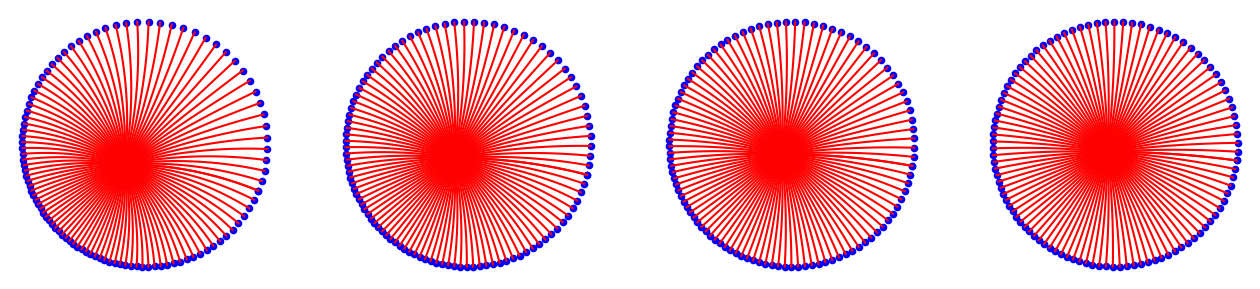

In [212]:
fig = plt.figure(figsize=(16,4))
for k in range(4):
    ax = fig.add_subplot(1,4,k+1)
    ax.plot(rm_gamma[k][:,:,0].T, rm_gamma[k][:,:,1].T, color='red')
    ax.set_xlabel("$x^{1}$")
    ax.set_ylabel("$x^{2}$")
    #ax.set_title(f"Geodesic Spray for T={T:.1f}")
    ax.scatter(rm_gamma[k][:,-1,0], rm_gamma[k][:,-1,1], color='blue', s=20)
    ax.grid()
    ax.set_box_aspect(1.0)
    ax.set_axis_off()
fig.savefig(figure_path+'rm_ivp2d.pdf', format="pdf", bbox_inches="tight")

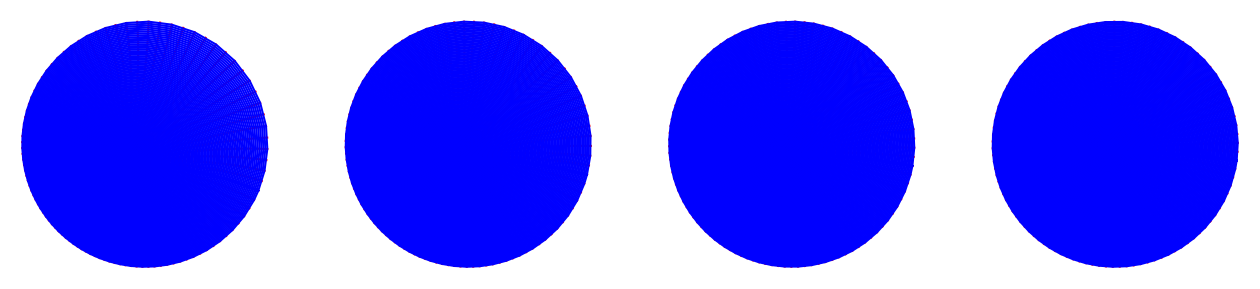

In [213]:
fig = plt.figure(figsize=(16,4))
for k in range(4):
    ax = fig.add_subplot(1,4,k+1)
    rm_gamma_circle = jnp.concatenate((rm_gamma[k], 
                                       rm_gamma[k][0].reshape(1,rm_gamma[k].shape[1], 
                                                              rm_gamma[k].shape[2])))
    ax.plot(rm_gamma[k][:,:,0].T, rm_gamma[k][:,:,1].T, color='red')
    ax.plot(rm_gamma_circle[:,:,0][::2], rm_gamma_circle[:,:,1][::2], color='blue')
    ax.set_xlabel("$x^{1}$")
    ax.set_ylabel("$x^{2}$")
    #ax.set_title(f"IVP Geodesics for T={T:.1f}")
    ax.grid()
    ax.set_box_aspect(1.0)
    ax.set_axis_off()
fig.savefig(figure_path+'rm_ivp2d_circle.pdf', format="pdf", bbox_inches="tight")

using M.Exp for Logarithm


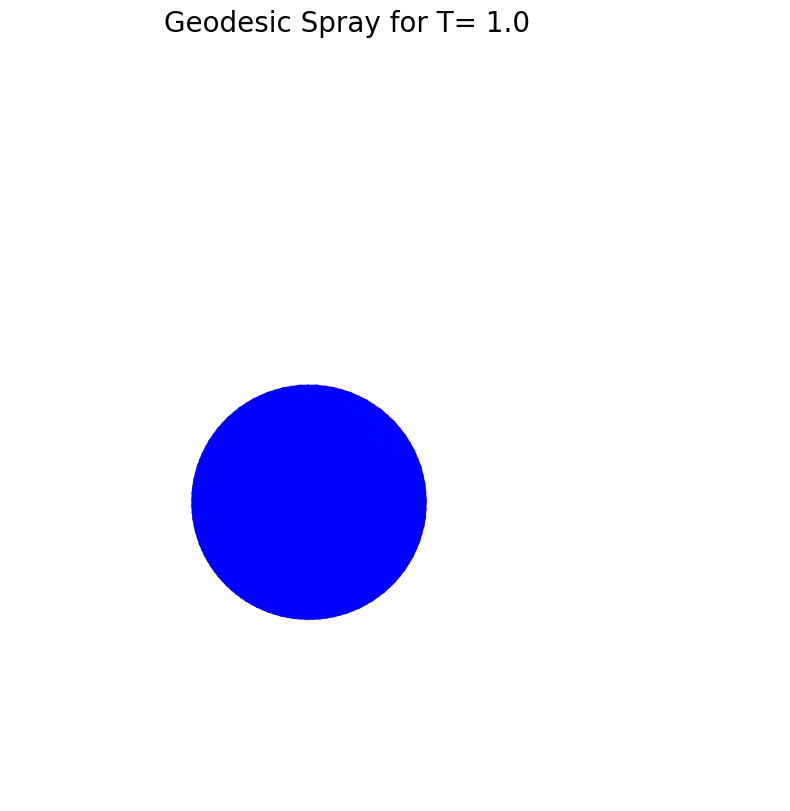

In [214]:
time_grid, rm_gamma, gamma_chart, gamma_v = vmap(lambda t: M_geodesic(t))(t_plot)
rm_gamma_circle = jnp.concatenate((rm_gamma, rm_gamma[:,0].reshape(rm_gamma.shape[0],1,rm_gamma.shape[2], 
                                                                   rm_gamma.shape[3])), axis=1)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
camera = Camera(fig)# the camera gets the fig we'll plot
ax.set_xlabel("$x^{1}$")
ax.set_ylabel("$x^{2}$")
ax.grid()
ax.set_box_aspect(1.0)
ax.set_axis_off()
for i in range(len(t_plot)):
    ax.plot(rm_gamma[i,:,:,0].T, rm_gamma[i,:,:,1].T, color='red')
    ax.plot(rm_gamma_circle[i,:,:,0][::2], rm_gamma_circle[i,:,:,1][::2], color='blue')
    ax.text(0.2, 1.0, f"Geodesic Spray for T= {t_plot[i]:.1f}", transform=ax.transAxes)
    camera.snap()
animation = camera.animate() # animation ready
animation.save(figure_path+'rm_2divp.gif',
               dpi=300,
               savefig_kwargs={
                   'pad_inches': 'tight'
               }
              )
HTML(animation.to_html5_video()) # displaying the animation

using M.Exp for Logarithm


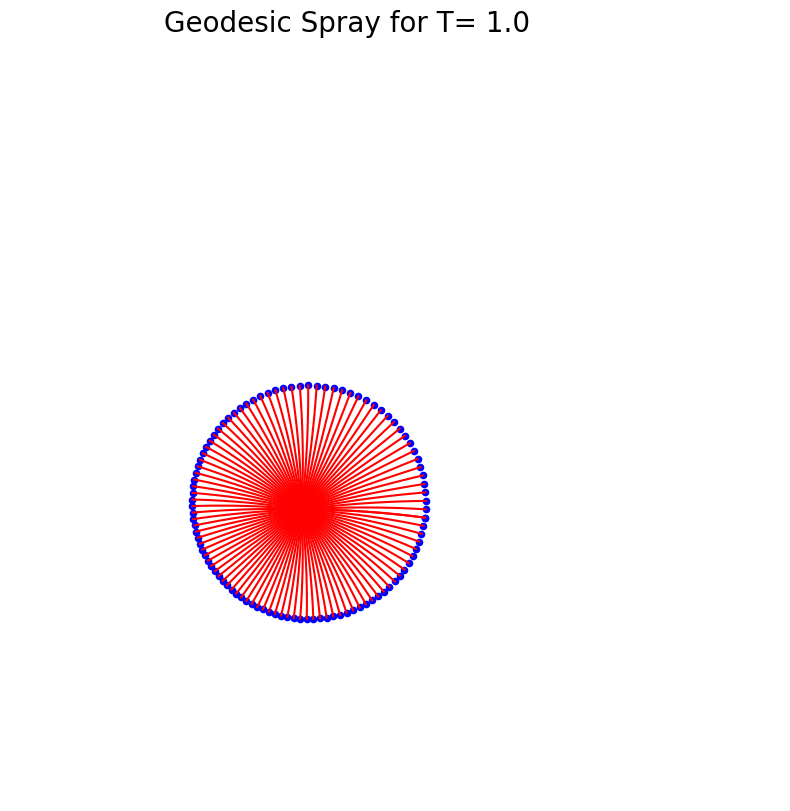

In [215]:
time_grid, rm_gamma, gamma_chart, gamma_v = vmap(lambda t: M_geodesic(t))(t_plot)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
camera = Camera(fig)# the camera gets the fig we'll plot
ax.set_xlabel("$x^{1}$")
ax.set_ylabel("$x^{2}$")
ax.grid()
ax.set_box_aspect(1.0)
ax.set_axis_off()
for i in range(len(t_plot)):
    ax.plot(rm_gamma[i,:,:,0].T, rm_gamma[i,:,:,1].T, color='red')
    ax.scatter(rm_gamma[i,:,-1,0], rm_gamma[i,:,-1,1], color='blue', s=20)
    ax.text(0.2, 1.0, f"Geodesic Spray for T= {t_plot[i]:.1f}", transform=ax.transAxes)
    camera.snap()
animation = camera.animate() # animation ready
animation.save(figure_path+'rm_2divp.gif',
               dpi=300,
               savefig_kwargs={
                   'pad_inches': 'tight'
               }
              )
HTML(animation.to_html5_video()) # displaying the animation


### Converting Geodesics to Sphere using Steographic Projection

In [216]:
def F_steographic(x):
            
    s2 = jnp.sum(x**2)
    
    return jnp.concatenate(((1-s2).reshape(1), 2*x))/(1+s2)
                    
def invF_steographic(x):

    x0 = x[0]

    return vmap(lambda xi: xi/(1+x0))(x[1:])

In [217]:
time_grid, rm_gamma, gamma_chart, gamma_v = M_geodesic(0.0)
rm_gamma_steopgrahic = vmap(lambda x: vmap(lambda y: F_steographic(y))(x))(rm_gamma)

using M.Exp for Logarithm


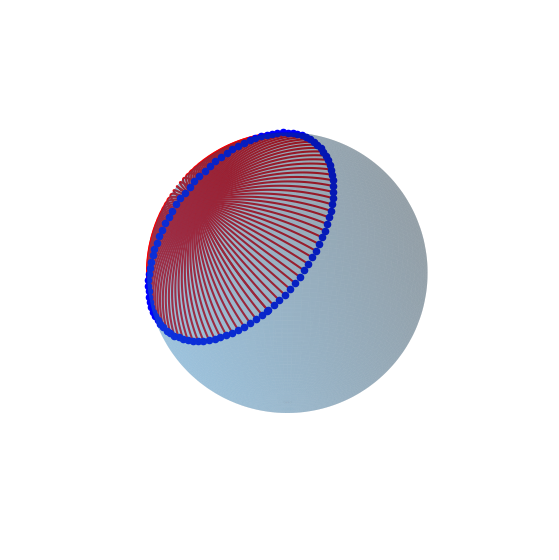

In [218]:
phi = jnp.linspace(-jnp.pi, jnp.pi, 100)
theta = jnp.linspace(-jnp.pi*0.5, jnp.pi*0.5, 100)
X1_heat = jnp.outer(jnp.cos(phi), jnp.cos(theta))
X2_heat = jnp.outer(jnp.sin(phi), jnp.cos(theta))
X3_heat = jnp.outer(jnp.ones_like(phi), jnp.sin(theta))

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1_heat, X2_heat, X3_heat, rstride=1, cstride=1, alpha=0.25)

for i in range(len(rm_gamma_steopgrahic)-1):
    ax.plot(rm_gamma_steopgrahic[i][:,0], rm_gamma_steopgrahic[i][:,1], 
            rm_gamma_steopgrahic[i][:,2],color='red')
    ax.scatter(rm_gamma_steopgrahic[i][-1,0], rm_gamma_steopgrahic[i][-1,1], 
               rm_gamma_steopgrahic[i][-1,2],color='blue',
              s=20)
ax.plot(rm_gamma_steopgrahic[-1][:,0], rm_gamma_steopgrahic[-1][:,1], rm_gamma_steopgrahic[-1][:,2],
        color='red',
       label='Geodesic Spray')
ax.scatter(rm_gamma_steopgrahic[-1][-1,0], rm_gamma_steopgrahic[i][-1,1], rm_gamma_steopgrahic[-1][-1,2],
           color='blue',
              s=20)
ax.view_init(20,120)
#ax.legend()
ax.set_xlabel(r'$x^{1}$')
ax.set_ylabel(r'$x^{2}$')
ax.set_zlabel(r'$x^{3}$')
ax.set_xlim((-1.1, 1.1))
ax.set_ylim((-1.1, 1.1))
ax.set_zlim((-1.1, 1.1))
ax.set_box_aspect([1,1,1])
ax.autoscale(False)
ax.set_axis_off()
#ax.grid(False)
#ax.set_xticks([])
#ax.set_yticks([])
#ax.set_zticks([])
plt.tight_layout()
fig.savefig(figure_path+'rm_ivp3d.pdf', format="pdf", bbox_inches="tight")

### Sectional Curvature

In [219]:
def sec_curvature(t, x, eps):
    
    e1 = jnp.array([1.0, 0.0])
    e2 = jnp.array([0.0, 1.0])
    
    M = RiemannIndicatrix(mua_fun=lambda x: mua_fun(t,x),
                        mub_fun=lambda x: mub_fun(t,x),
                   mutheta_fun=lambda x: mutheta_fun(t,x),
                   eps=eps,
                   sigmaa_fun=lambda x: sigmaa_fun(t,x),
                   sigmab_fun=lambda x: sigmab_fun(t,x),
                   sigmatheta_fun=lambda x: sigmatheta_fun(t,x))
    
    return M.SectionalCurvature((x,jnp.zeros(1)), e1, e2)

In [220]:
N_grid = 100
x1 = jnp.linspace(-2.0, 2.0, N_grid)
x2 = jnp.linspace(-2.0, 2.0, N_grid)
X1, X2 = jnp.meshgrid(x1,x2)
X = jnp.concatenate((X1.reshape(N_grid, N_grid, 1), X2.reshape(N_grid, N_grid, 1)), axis=-1)
sec = vmap(lambda t: vmap(lambda x: vmap(lambda y: sec_curvature(t,y, jnp.zeros(3)))(x))(X))(jnp.array([0.25,0.5,0.75,1.0]))

using M.Exp for Logarithm


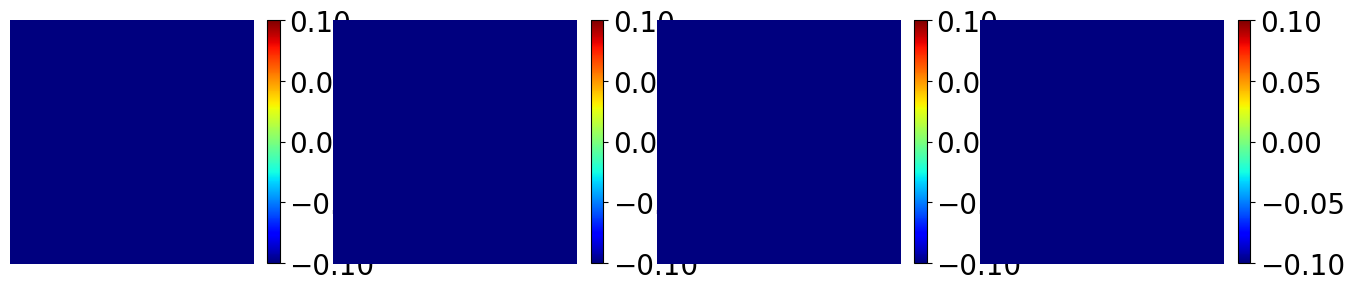

In [221]:
fig = plt.figure(figsize=(16,4))
#heatmap, xedges, yedges = np.histogram2d(spherical_data[:,0], spherical_data[:,1], bins=bins)
#heatmap = gaussian_filter(sec, sigma=1.0)
#heatmap /= jnp.linalg.norm(heatmap)
heatmap = sec
extent = [-2.0, 2.0, -2.0, 2.0]
for k in range(4):
    ax = fig.add_subplot(1,4,k+1)
    ax.imshow(sec[k].T, extent=extent, origin='lower', cmap=cm.jet)
    ax.set_xlim([-2.0, 2.0])
    ax.set_ylim([-2.0, 2.0])
    #ax.set_title(f"Sectional Curvature for T={T:.1f}")
    ax.set_xlabel("$x^{1}$")
    ax.set_ylabel("$x^{2}$")
    ax.set_box_aspect(1.0)
    ax.set_axis_off()
    m = mpl.cm.ScalarMappable(cmap=mpl.cm.jet)
    m.set_array(sec[k])
    fig.colorbar(m, ax=ax, fraction=0.045, pad=0.05)

plt.show()

fig.savefig(figure_path+'rm_curvature.pdf', format="pdf", bbox_inches="tight")

## Stochastic Pertubations

In [227]:
N_sim = 100
key = jran.PRNGKey(2712)
eps = jran.normal(key, shape=(N_sim, 3))

### Indicatrices 

In [228]:
def indicatrix(t, x, eps=jnp.zeros(3), N=100):
    
    x = (x, jnp.zeros(len(x)))
    
    phi = jnp.linspace(0, 2*jnp.pi, N)
    
    a = mua_fun(t,x)+sigmaa_fun(t,x)*eps[0]
    b = mub_fun(t,x)+sigmab_fun(t,x)*eps[1]
    theta = mutheta_fun(t,x)+sigmatheta_fun(t,x)*eps[2]
    
    x1 = a*jnp.cos(phi)*jnp.cos(theta)-b*jnp.sin(phi)*jnp.sin(theta)+x[0][0]
    x2 = a*jnp.cos(phi)*jnp.sin(theta)+b*jnp.sin(phi)*jnp.cos(theta)+x[0][1]
    
    return x1, x2

q1, q2 = vmap(lambda e: vmap(lambda y: vmap(lambda x: indicatrix(T, x, e))(y))(X_plot))(eps)

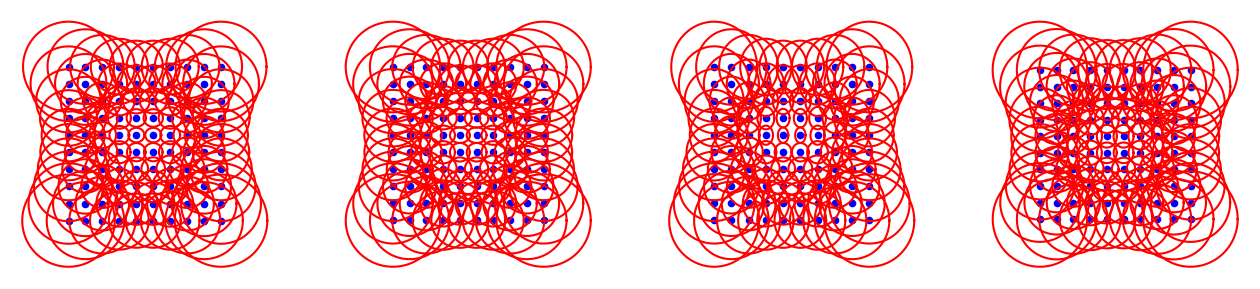

In [229]:
fig = plt.figure(figsize=(16,4))
for k in range(4):
    ax = fig.add_subplot(1,4,k+1)
    for i in range(N_plot):
        for j in range(N_plot):
            ax.plot(q1[k,i,j,:], q2[k,i,j,:], color='red')
            ax.scatter(X_plot[i,j,0], X_plot[i,j,1], color='blue', s=20)

    ax.set_xlabel("$x^{1}$")
    ax.set_ylabel("$x^{2}$")
    #ax.set_title(f"Indicatrices for T={T:.1f}")
    ax.grid()
    ax.set_box_aspect(1.0)
    ax.set_axis_off()

plt.show()
fig.savefig(figure_path+'srm_indicatrix.pdf', format="pdf", bbox_inches="tight")

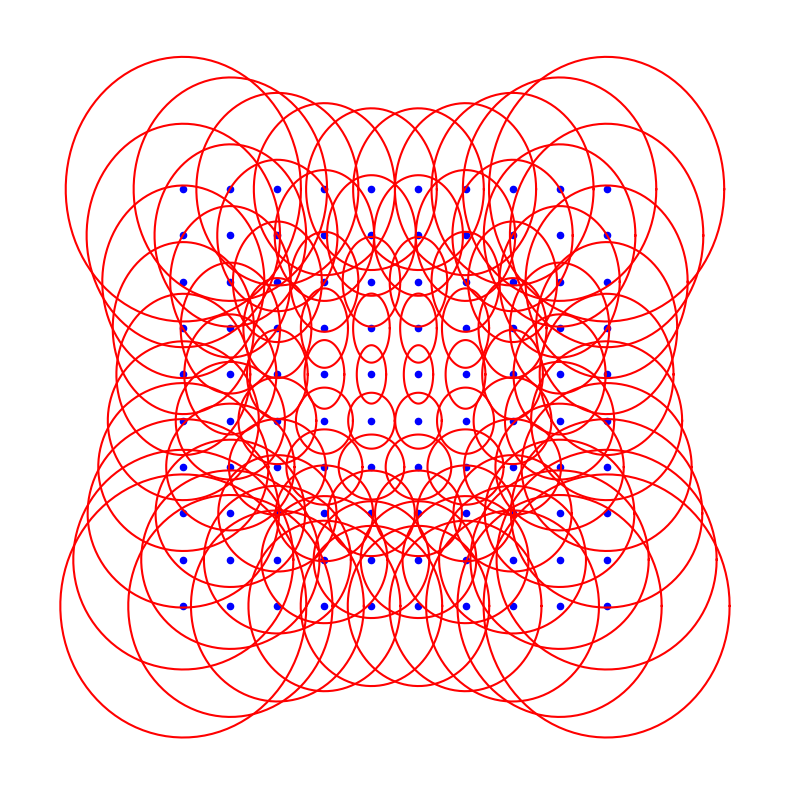

In [230]:
#heatmap, xedges, yedges = np.histogram2d(spherical_data[:,0], spherical_data[:,1], bins=bins)
#heatmap = gaussian_filter(sec, sigma=1.0)
#heatmap /= jnp.linalg.norm(heatmap)
#heatmap = sec[:,50,:]
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
camera = Camera(fig)# the camera gets the fig we'll plot
ax.set_xlabel("$x^{1}$")
ax.set_ylabel("$x^{2}$")
#ax.set_title(f"Indicatrices for T={T:.1f} with varying gaussian noise")
ax.grid()
ax.set_box_aspect(1.0)
ax.set_axis_off()
for k in range(len(eps[:10])):
    for i in range(N_plot):
        for j in range(N_plot):
            ax.plot(q1[k,i,j,:], q2[k,i,j,:], color='red')
            ax.scatter(X_plot[i,j,0], X_plot[i,j,1], color='blue', s=20)

    #fig.colorbar(m, ax=ax, fraction=0.045, pad=0.05)
    
    camera.snap()
animation = camera.animate() # animation ready
animation.save(figure_path+'srm_indicatrix.gif',
               dpi=300,
               savefig_kwargs={
                   'pad_inches': 'tight'
               }
              )
HTML(animation.to_html5_video()) # displaying the animation

    #plt.show()
    #fig.savefig(figure_path+'volume'+str(t_val[i]).replace('.','_')+'.pdf', format="pdf", bbox_inches="tight")

### Computing the Metric

In [231]:
def volume_measure(t, x, eps):
    
    M = RiemannIndicatrix(mua_fun=lambda x: mua_fun(t,x),
                        mub_fun=lambda x: mub_fun(t,x),
                   mutheta_fun=lambda x: mutheta_fun(t,x),
                   eps=eps,
                   sigmaa_fun=lambda x: sigmaa_fun(t,x),
                   sigmab_fun=lambda x: sigmab_fun(t,x),
                   sigmatheta_fun=lambda x: sigmatheta_fun(t,x))
    
    return jnp.sqrt(jnp.linalg.det(M.g((x, jnp.zeros(1)))))

g = vmap(lambda e: vmap(lambda y: vmap(lambda x: volume_measure(T,x,e))(y))(X_grid))(eps)

using M.Exp for Logarithm


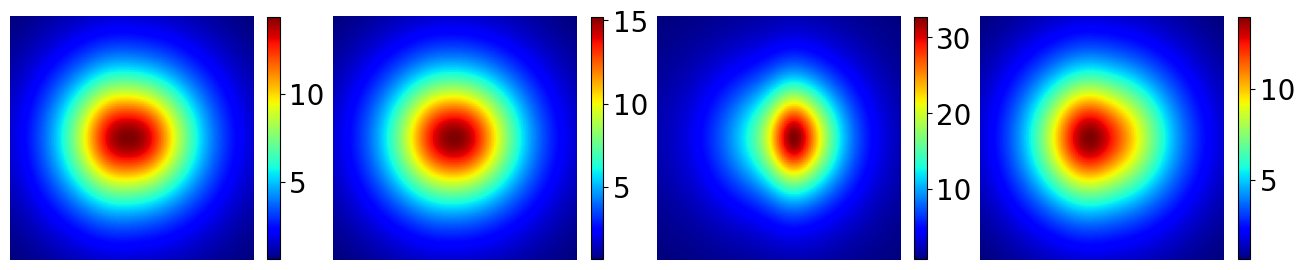

In [232]:
#heatmap, xedges, yedges = np.histogram2d(spherical_data[:,0], spherical_data[:,1], bins=bins)
#heatmap = gaussian_filter(sec, sigma=1.0)
#heatmap /= jnp.linalg.norm(heatmap)
#heatmap = sec[:,50,:]

fig = plt.figure(figsize=(16,4))
extent = [start, end, start, end]
for k in range(4):
    ax = fig.add_subplot(1,4,k+1)
    ax.imshow(g[k].T, extent=extent, origin='lower', cmap=cm.jet)
    ax.set_xlim([start, end])
    ax.set_ylim([start, end])
    #ax.set_title("Riemannian Volume Measure for T={T:.1f}")
    ax.set_xlabel(r'$x^{1}$')
    ax.set_ylabel(r'$x^{2}$')
    m = mpl.cm.ScalarMappable(cmap=mpl.cm.jet)
    m.set_array(g[k])
    fig.colorbar(m, ax=ax, fraction=0.045, pad=0.05)
    ax.set_box_aspect(1.0)
    ax.set_axis_off()
    

plt.show()
fig.savefig(figure_path+'srm_volume.pdf', format="pdf", bbox_inches="tight")

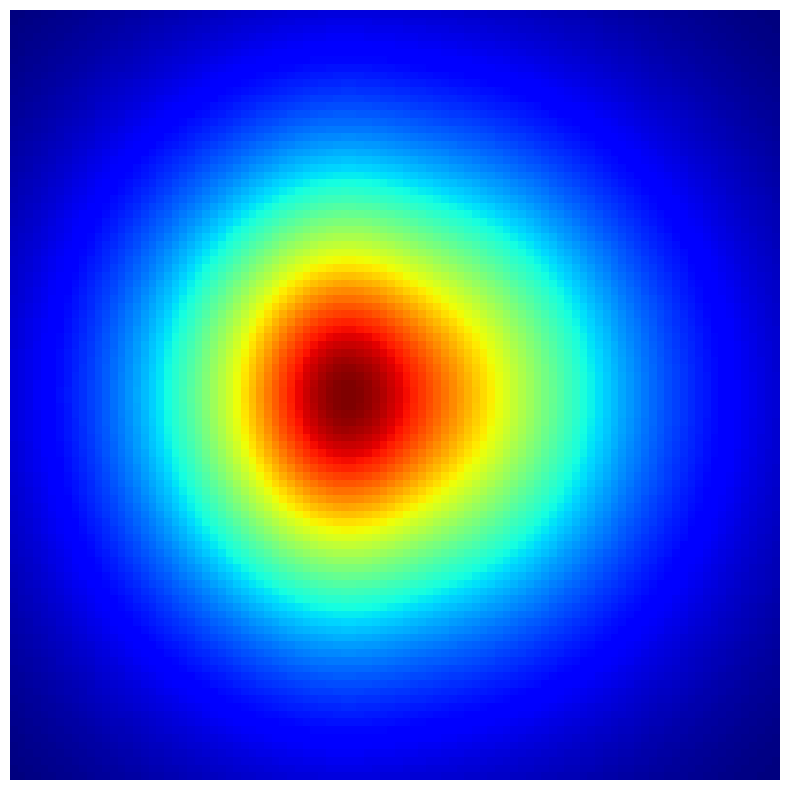

In [188]:
#heatmap, xedges, yedges = np.histogram2d(spherical_data[:,0], spherical_data[:,1], bins=bins)
#heatmap = gaussian_filter(sec, sigma=1.0)
#heatmap /= jnp.linalg.norm(heatmap)
#heatmap = sec[:,50,:]
extent = [start, end, start, end]
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
camera = Camera(fig)# the camera gets the fig we'll plot
ax.set_xlabel("$x^{1}$")
ax.set_ylabel("$x^{2}$")
ax.grid()
ax.set_box_aspect(1.0)
ax.set_axis_off()
for i in range(len(eps[:10])):
    ax.imshow(g[i].T, extent=extent, origin='lower', cmap=cm.jet)
    ax.set_xlim([start, end])
    ax.set_ylim([start, end])
    ax.set_xlabel(r'$x^{1}$')
    ax.set_ylabel(r'$x^{2}$')
    m = mpl.cm.ScalarMappable(cmap=mpl.cm.jet)
    m.set_array(g[i])
    #fig.colorbar(m, ax=ax, fraction=0.045, pad=0.05)
    
    camera.snap()
animation = camera.animate() # animation ready
animation.save(figure_path+'srm_volume.gif',
               dpi=300,
               savefig_kwargs={
                   'pad_inches': 'tight'
               }
              )
HTML(animation.to_html5_video()) # displaying the animation

    #plt.show()
    #fig.savefig(figure_path+'volume'+str(t_val[i]).replace('.','_')+'.pdf', format="pdf", bbox_inches="tight")

### IVP Geodesics

In [189]:
def M_geodesic(t, eps):
    
    M = RiemannIndicatrix(mua_fun=lambda x: mua_fun(t,x),
                          mub_fun=lambda x: mub_fun(t,x),
                          mutheta_fun=lambda x: mutheta_fun(t,x),
                          eps=eps,
                          sigmaa_fun=lambda x: sigmaa_fun(t,x),
                          sigmab_fun=lambda x: sigmab_fun(t,x))
    
    dt = dts(n_steps=100)


    N_spray = 100
    p0 = (jnp.zeros(2)+0.5, jnp.zeros(1))
    phi = jnp.linspace(0, 2*jnp.pi,N_spray)
    v = jnp.array([jnp.cos(phi), jnp.sin(phi)]).T
    v = v.T/vmap(lambda w: jnp.sqrt(w.dot(M.g(p0)).dot(w)))(v)
    
    time_grid, gamma, gamma_chart = vmap(lambda v: M.geodesic(p0, v, dt))(v.T)
    
    return time_grid, gamma[:,:,0], gamma_chart, gamma[:,:,1]

time_grid, rm_gamma, gamma_chart, gamma_v = vmap(lambda e: M_geodesic(T, e))(eps)

using M.Exp for Logarithm


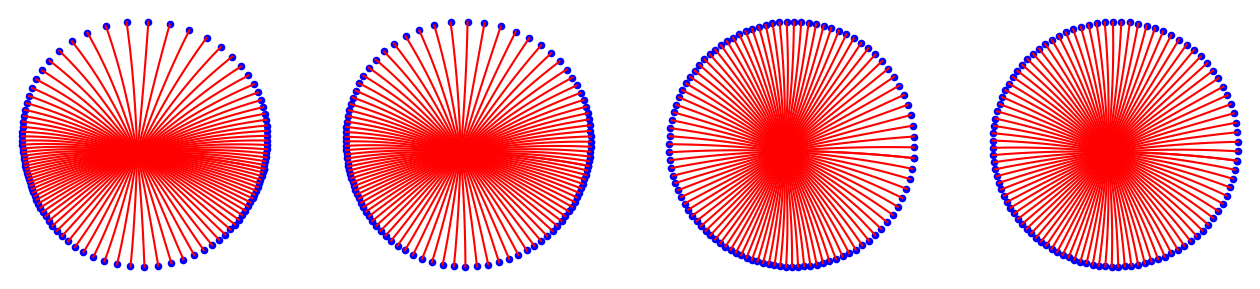

In [190]:
fig = plt.figure(figsize=(16,4))
for k in range(4):
    ax = fig.add_subplot(1,4,k+1)
    ax.plot(rm_gamma[k][:,:,0].T, rm_gamma[k][:,:,1].T, color='red')
    ax.set_xlabel("$x^{1}$")
    ax.set_ylabel("$x^{2}$")
    #ax.set_title(f"Geodesic Spray for T={T:.1f}")
    ax.scatter(rm_gamma[k][:,-1,0], rm_gamma[k][:,-1,1], color='blue', s=20)
    ax.grid()
    ax.set_box_aspect(1.0)
    ax.set_axis_off()
fig.savefig(figure_path+'srm_ivp2d.pdf', format="pdf", bbox_inches="tight")

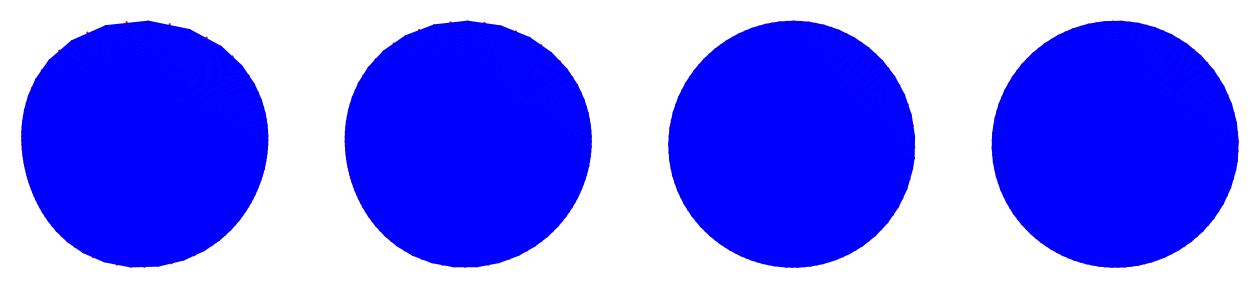

In [191]:
fig = plt.figure(figsize=(16,4))
for k in range(4):
    ax = fig.add_subplot(1,4,k+1)
    rm_gamma_circle = jnp.concatenate((rm_gamma[k], 
                                       rm_gamma[k][0].reshape(1,rm_gamma[k].shape[1], 
                                                              rm_gamma[k].shape[2])))
    ax.plot(rm_gamma[k][:,:,0].T, rm_gamma[k][:,:,1].T, color='red')
    ax.plot(rm_gamma_circle[:,:,0][::2], rm_gamma_circle[:,:,1][::2], color='blue')
    ax.set_xlabel("$x^{1}$")
    ax.set_ylabel("$x^{2}$")
    #ax.set_title(f"IVP Geodesics for T={T:.1f}")
    ax.grid()
    ax.set_box_aspect(1.0)
    ax.set_axis_off()
fig.savefig(figure_path+'srm_ivp2d_circle.pdf', format="pdf", bbox_inches="tight")

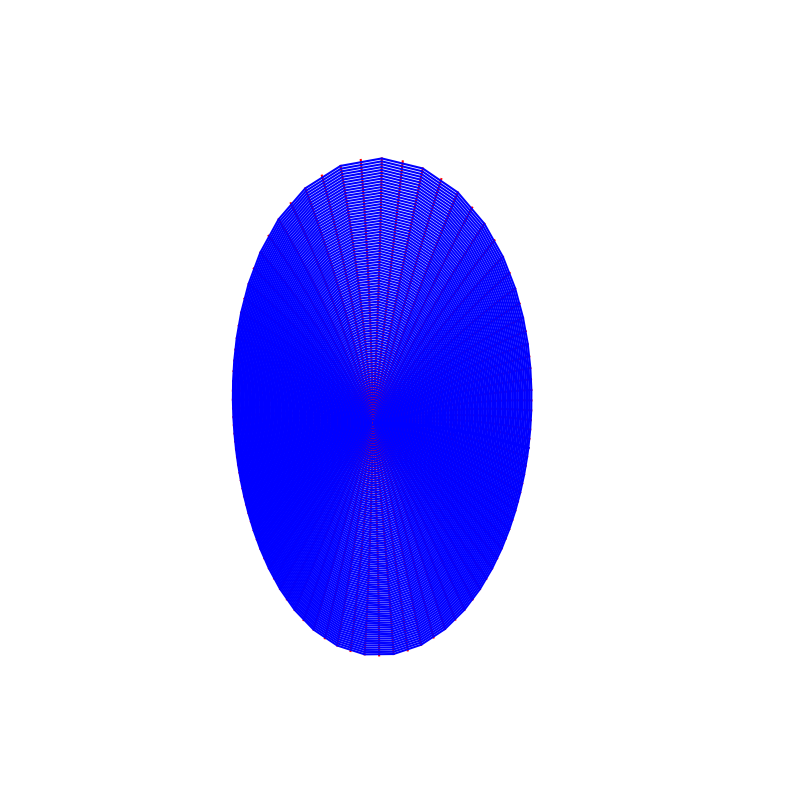

In [192]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
camera = Camera(fig)# the camera gets the fig we'll plot
ax.set_xlabel("$x^{1}$")
ax.set_ylabel("$x^{2}$")
ax.grid()
ax.set_box_aspect(1.0)
ax.set_axis_off()
for k in range(11):
    rm_gamma_circle = jnp.concatenate((rm_gamma[k], 
                                       rm_gamma[k][0].reshape(1,rm_gamma[k].shape[1], 
                                                              rm_gamma[k].shape[2])))
    ax.plot(rm_gamma[k][:,:,0].T, rm_gamma[k][:,:,1].T, color='red')
    ax.plot(rm_gamma_circle[:,:,0][::2], rm_gamma_circle[:,:,1][::2], color='blue')
    camera.snap()
animation = camera.animate() # animation ready
animation.save(figure_path+'srm_2divp.gif',
               dpi=300,
               savefig_kwargs={
                   'pad_inches': 'tight'
               }
              )
HTML(animation.to_html5_video()) # displaying the animation

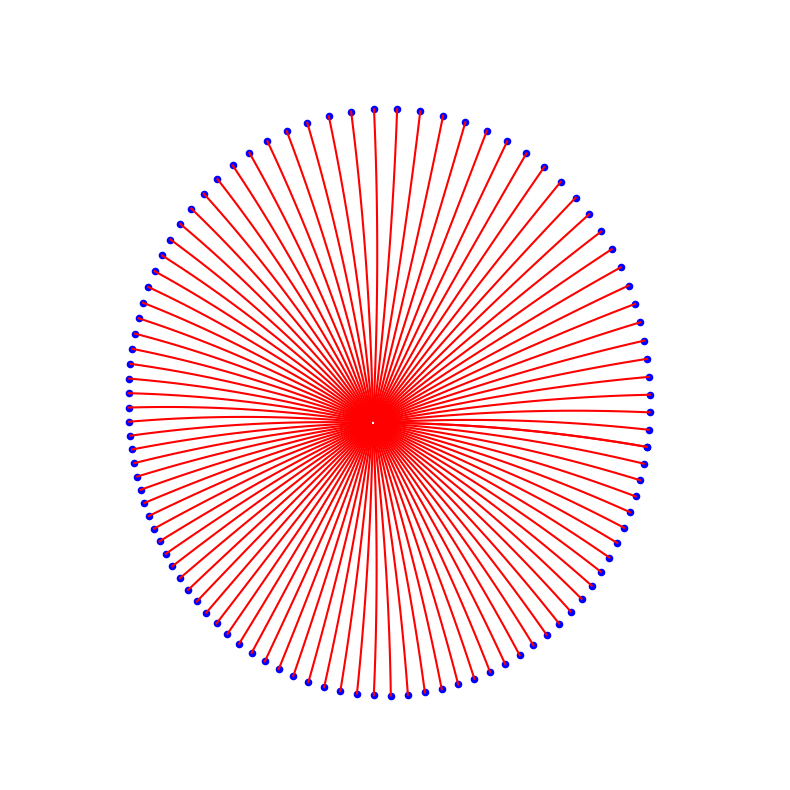

In [193]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
camera = Camera(fig)# the camera gets the fig we'll plot
ax.set_xlabel("$x^{1}$")
ax.set_ylabel("$x^{2}$")
ax.grid()
ax.set_box_aspect(1.0)
ax.set_axis_off()
for k in range(10):
    ax.plot(rm_gamma[k][:,:,0].T, rm_gamma[k][:,:,1].T, color='red')
    ax.scatter(rm_gamma[k][:,-1,0], rm_gamma[k][:,-1,1], color='blue', s=20)
    camera.snap()
animation = camera.animate() # animation ready
animation.save(figure_path+'srm_2divp.gif',
               dpi=300,
               savefig_kwargs={
                   'pad_inches': 'tight'
               }
              )
HTML(animation.to_html5_video()) # displaying the animation


### Sectional Curvature

In [194]:
def sec_curvature(t,eps):
    
    M = RiemannIndicatrix(mua_fun=lambda x: mua_fun(t,x),
                        mub_fun=lambda x: mub_fun(t,x),
                   mutheta_fun=lambda x: mutheta_fun(t,x),
                   eps=eps,
                   sigmaa_fun=lambda x: sigmaa_fun(t,x),
                   sigmab_fun=lambda x: sigmab_fun(t,x),
                   sigmatheta_fun=lambda x: sigmatheta_fun(t,x))
    
    return vmap(lambda x: vmap(lambda y: M.SectionalCurvature((y,jnp.zeros(1)), e1, e2))(x))(X)

N_grid = 100
e1 = jnp.array([1.0, 0.0])
e2 = jnp.array([0.0, 1.0])
x1 = jnp.linspace(-2.0, 2.0, N_grid)
x2 = jnp.linspace(-2.0, 2.0, N_grid)
X1, X2 = jnp.meshgrid(x1,x2)
X = jnp.concatenate((X1.reshape(N_grid, N_grid, 1), X2.reshape(N_grid, N_grid, 1)), axis=-1)
sec = vmap(lambda e: sec_curvature(T, e))(eps)

using M.Exp for Logarithm


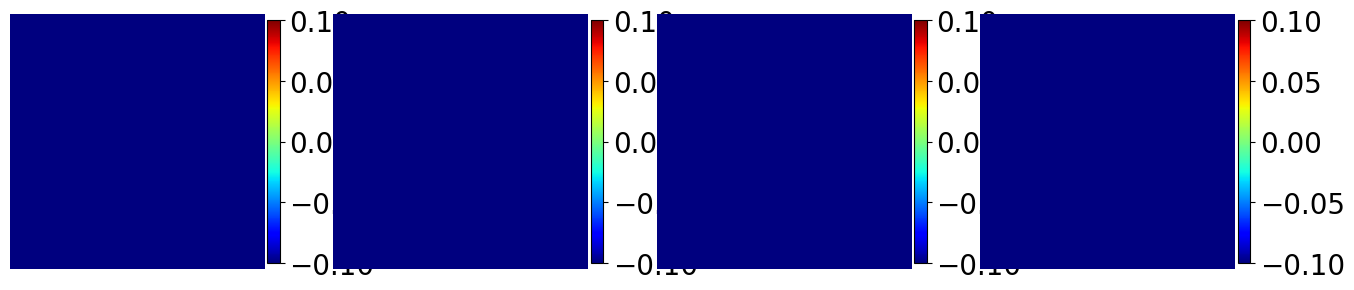

In [195]:
fig = plt.figure(figsize=(16,4))
for k in range(4):    
    ax = fig.add_subplot(1,4,k+1)
    #heatmap, xedges, yedges = np.histogram2d(spherical_data[:,0], spherical_data[:,1], bins=bins)
    #heatmap = gaussian_filter(sec, sigma=1.0)
    #heatmap /= jnp.linalg.norm(heatmap)
    heatmap = sec[k]
    extent = [-2.0, 2.0, -2.0, 2.0]
    ax.imshow(heatmap.T, extent=extent, origin='lower', cmap=cm.jet)
    ax.set_xlim([-2.0, 2.0])
    ax.set_ylim([-2.0, 2.0])
    #ax.set_title("Sectional Curvature")
    ax.set_xlabel("$x^{1}$")
    ax.set_ylabel("$x^{2}$")
    m = mpl.cm.ScalarMappable(cmap=mpl.cm.jet)
    m.set_array(heatmap.T)
    fig.colorbar(m, ax=ax, fraction=0.045, pad=0.01)
    
    ax.set_box_aspect(1.0)
    ax.set_axis_off()

plt.show()

fig.savefig(figure_path+'srm_curvature.pdf', format="pdf", bbox_inches="tight")    

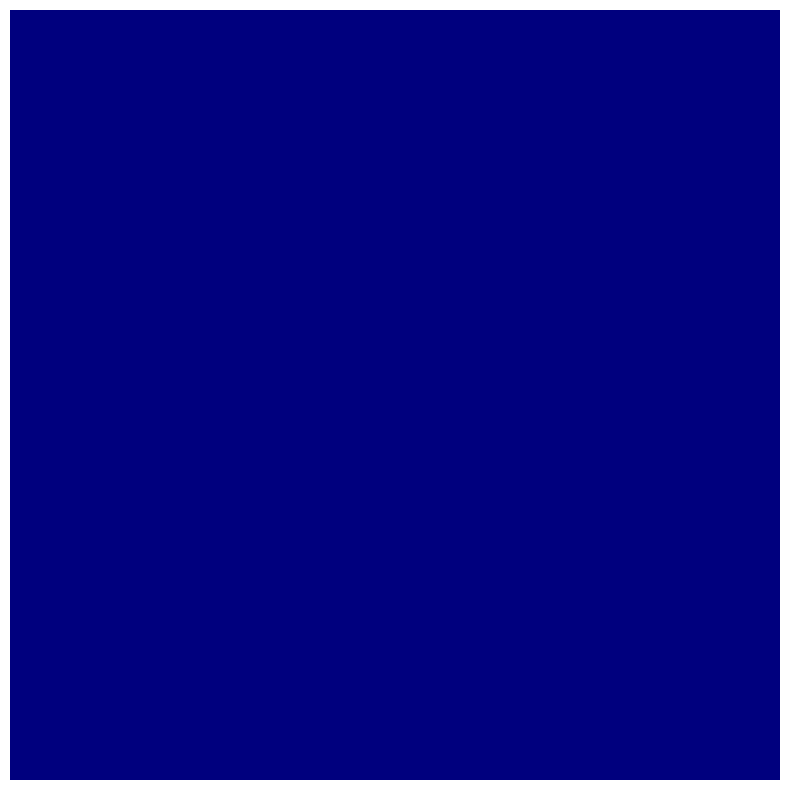

In [196]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
camera = Camera(fig)# the camera gets the fig we'll plot
ax.set_xlabel("$x^{1}$")
ax.set_ylabel("$x^{2}$")
ax.grid()
ax.set_box_aspect(1.0)
ax.set_axis_off()
for k in range(10):
    ax.imshow(sec[k].T, extent=extent, origin='lower', cmap=cm.jet)
    ax.set_xlim([-2.0, 2.0])
    ax.set_ylim([-2.0, 2.0])
    camera.snap()
animation = camera.animate() # animation ready
animation.save(figure_path+'srm_curvature.gif',
               dpi=300,
               savefig_kwargs={
                   'pad_inches': 'tight'
               }
              )
HTML(animation.to_html5_video()) # displaying the animation
